### В данной работе будут рассмотрены данные по 50 самым популярным песням в Spotify ежегодно. В планах данной работы является сравнение разных параметров, подсчет корреляций и визуализация зависимостей различных параметров друг от друга. 

### Сначала установим необходимые для дальнейшего анализа библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets
%matplotlib inline

### Прочитаем наш файл с топ-50 песен по данным Spotify ежегодно. 

In [3]:
top50 = pd.read_csv("/content/top10.csv")

### Посмотрим на него

In [4]:
top50

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


Попался удобный датафрейм, где значения в первом столбце совпадают с номером строчки, поэтому оставим все как есть и не будем пока что устанавливать индекс столбец. Для дальнейших задач, возможно, придется его менять. 

In [6]:
firstrow = top50.head(1)
startyear = firstrow["year"]
startyear

0    2010
Name: year, dtype: int64

In [7]:
lastrow = top50[-1:]
endyear = lastrow["year"]
endyear

602    2019
Name: year, dtype: int64

### Таким образом мы нашли за какой период представлены данные. (С 2010 года по 2019)

### Посмотрим как менялись музыкальные вкусы людей за выбранный период. Для этого сравним жанры песен, ставших самыми популярными в мире в свой год:

In [9]:
maxpopdf = pd.DataFrame(columns = ["year", "top genre", "pop"])
maxpopdf["top genre"] = top50["top genre"]
maxpopdf["pop"] = top50["pop"]
maxpopdf["year"] = top50["year"]

In [10]:
# Выведем в таблице треки с самым большим значением популярности (pop) за каждый год:
topgenrebypop = maxpopdf.loc[maxpopdf.groupby('year')['pop'].idxmax()]
topgenrebypop

,year,top genre,pop
0,2010,neo mellow,83
51,2011,dance pop,81
104,2012,dance pop,80
139,2013,dance pop,88
210,2014,neo mellow,86
268,2015,pop,84
363,2016,canadian contemporary r&b,84
443,2017,pop,87
508,2018,dance pop,86
572,2019,pop,99


In [11]:
# Посчитаем сколько раз каждый жанр становился самым популярным (ежегодно):
topgenrebypop = topgenrebypop.drop(["pop"], axis = 'columns')
topgenrebypop.groupby('top genre').count()

,year
top genre,
canadian contemporary r&b,1
dance pop,4
neo mellow,2
pop,3


Как мы видим, чаще всего самой популярной песней становился трек в жанре dance pop. Вторым по часоте является жанр pop. На 3 и 4 месте расположились neo mellow и canadian contemporary r&b	соответственно

Существует такой стереотип, что, чем громче музыкальная композиция, тем она круче. Проверим, соответствует ли данная мысль действительности:


Предварительно стоит сделать оговорку, что в дальнейшем громкими будут называться треки со значением децибел большим, чем -2, а тихими - со значением децибел меньше, чем -6

In [13]:
# Посторим 3D диаграмму рассеивания, будем брать из изначального датафрейма столбцы с громкостью (dB) и популярностью (pop):
from mpl_toolkits.mplot3d import Axes3D
def loudpop(top50):
  loudpopdf = top50[['dB','pop', "year"]].copy()
  loudpopdf["dB"] = loudpopdf["dB"] * (-1) # Заменим отрицательные значения децибел на положительные, чтобы график выводился корректно
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection = '3d')
  x = loudpopdf["dB"]
  y = loudpopdf["pop"]
  z = loudpopdf["year"]
  ax.scatter(x, y, z, c = "b", s = 10, marker = "^")
  ax.set_xlabel("Отрицательная громоксть")
  ax.set_ylabel("Популярность")
  ax.set_zlabel("Год")
  return plt.show()

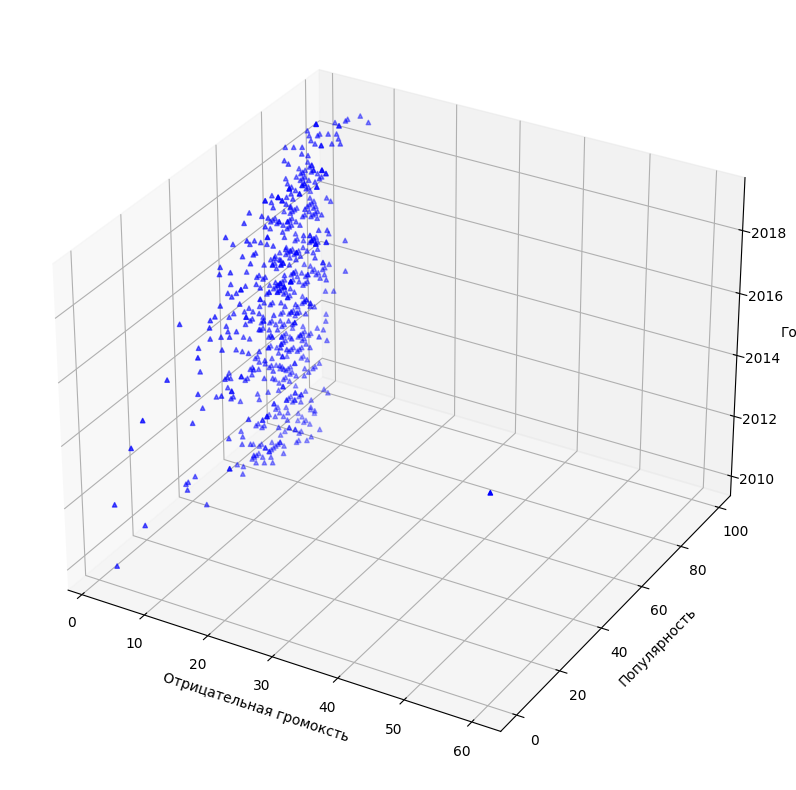

In [14]:
loudpop(top50)

Построить то мы построили, но получше разглядеть что происходит на диаграмме нам мешает какой-то очень тихий трек. Избавимся от него и посмотрим, что тогда будет видно:

In [15]:
for_loud_hypo_df = top50[top50["dB"] > -20]

In [16]:
def normal_loudpop(for_loud_hypo_df):
  loudpopdf = for_loud_hypo_df[['dB','pop', "year"]].copy()
  loudpopdf["dB"] = loudpopdf["dB"] * (-1)
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection = '3d')
  x = loudpopdf["dB"]
  y = loudpopdf["pop"]
  z = loudpopdf["year"]
  ax.scatter(x, y, z, c = "b", s = 10, marker = "^")
  ax.set_xlabel("Отрицательная громоксть")
  ax.set_ylabel("Популярность")
  ax.set_zlabel("Год")
  return plt.show()

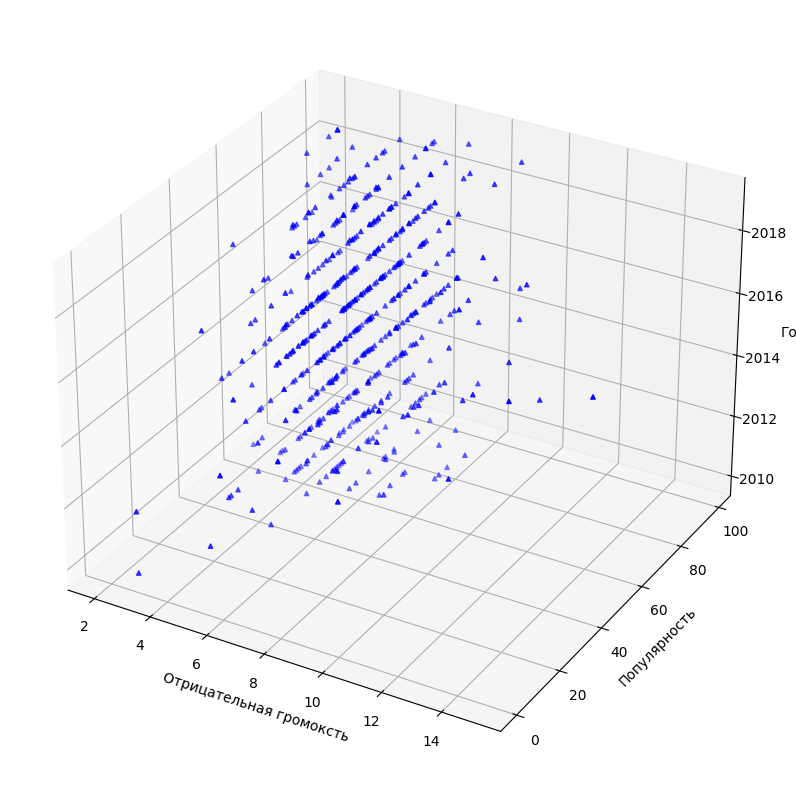

In [17]:
normal_loudpop(for_loud_hypo_df)

Так то лучше! На данной диаграмме можно заметить, что большинство значени распоолжены в промежутке от 60 до 100 по оси "Популярность" и от 2 до 10 по оси "Громкость". Стоит пояснить, что посокльку мы смотрим на отрицательные значения громкости, то, чем ближе значение к 0, тем трек громче. Видно, что некоторые громкие треки имеют маленькое значение популярности, а некоторые тихие (их побольше) имеют высокую популярность. Для простоты подсчетов предположим, что громкие треки более популярны, чем тихие и сделаем тест:

In [19]:
# Считаем корреляцию с помощью pearsonr и выводим только 0-й элемент (значение корреляции), на p-value смотреть не будем
import scipy.stats as stats
from scipy.stats import pearsonr
correlation = pearsonr(for_loud_hypo_df["dB"], for_loud_hypo_df["pop"])[0]
print(correlation)

0.014400240348056184


К сожалению, как мы видим коэффициент корреляции между популярностью и громкостью близок к 0, поэтому мы не можем ни опровергнуть, ни подтвердить гипотезу о том, что громкие треки более популярны. А те случаи, когда тихие треки имели высокую популярность, а грмомкие - низкую, являются не более, чем случайностью :(

### Раз уж случилась такая ситуация с маленькой корреляцией между популярностью и громкостью, давайте найдем все корреляции между параметрами в нашей таблице (кроме текстовых параметров) и посмотрим, что из этого получится:

In [20]:
# Сделаем новый датафрейм без столбцов с текстом, чтобы посчитать корреляции для каждого числового параметра:
for_corr_df = top50.drop(["year", "title", "artist", "top genre"], axis = "columns")
corr_df = for_corr_df.corr()
for_corr_df

,Unnamed: 0,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,97,89,67,-4,8,80,217,19,4,83
1,2,87,93,75,-5,52,64,263,24,23,82
2,3,120,84,76,-3,29,71,200,10,14,80
3,4,119,92,70,-4,8,71,295,0,4,79
4,5,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,599,104,66,61,-7,20,16,176,1,3,75
599,600,95,79,75,-6,7,61,206,21,12,75
600,601,136,76,53,-5,9,65,260,7,34,70
601,602,114,79,60,-6,42,24,217,1,7,69


Построим таблицу корреляций:

In [21]:
def corr_graph(corr_df):
  plt.imshow(corr_df, cmap = 'plasma', aspect='auto', vmax = 1, vmin = -1)
  plt.colorbar()
  len_of_df = len(corr_df["bpm"])
  plt.xticks(range(len_of_df), corr_df.columns)
  plt.yticks(range(len_of_df), corr_df.columns)
  plt.title("Таблица корреляций")
  return plt.show()

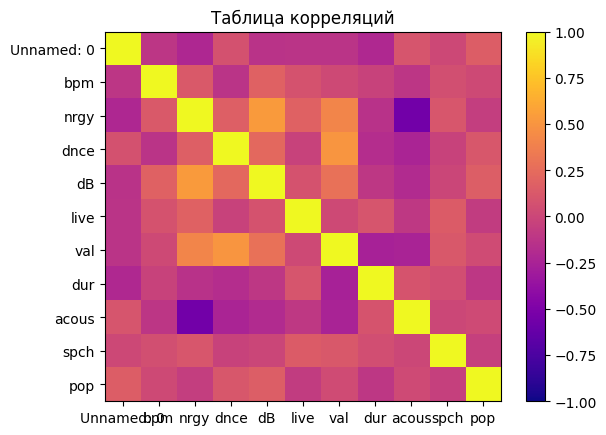

In [22]:
corr_graph(corr_df)


### Заметим, что достаточно необычно на фоне остальных выглядит фиолетовый квадрат, соответствующий корреляции между параметрами acous и nrgy. acous (Acousticness) говорит о том, насколько "живой" является композиция, как много в ней используются живые инсструменты. nrgy (Energy) показывает насколько трек является энергичным (быстрым, громким). Построим график, чтобы разобраться поподробнее:

In [23]:
# Построим диаграмму рассеивания (далее все так же будут строиться диаграммы рассеивания):
def acous_vs_nrgy(top50):
  acous_nrgy_df = top50[['acous','nrgy', "year"]].copy()
  acous_nrgy_df.set_index("year", inplace = True)
  fig, ax = plt.subplots()
  ax.scatter(x = acous_nrgy_df['acous'], y = acous_nrgy_df['nrgy'], c = "b", marker = "s", s = 7)
  ax.set_xlabel("Акустичность")
  ax.set_ylabel("Энергичность")
  plt.title("acous vs nrgy")
  return plt.show()

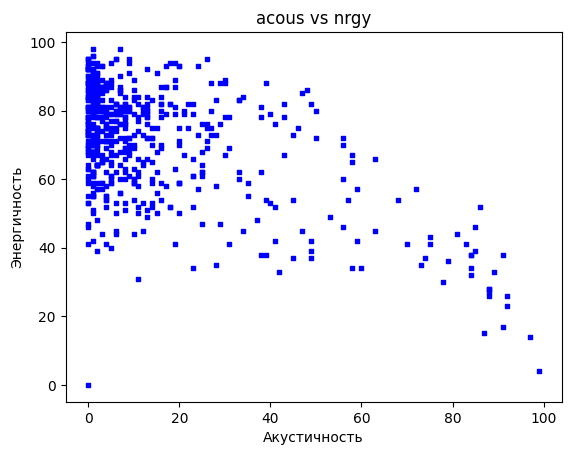

In [24]:
acous_vs_nrgy(top50)

Посмотрев на график, можно заметить некоторую зависимость между акустичностью и энергичностью, а именно обратную связь этих двух парметров. Чем больше используется в музыке живых инструментов, тем меньше энергичность песни. На первый взгляд это кажется странным, ведь живые инструменты должны придавать песне жизни, однако данные говорят об обратном. 

Посчитаем корреляцию этих двух параметров:

In [25]:
acous_nrg_corr = pearsonr(top50["acous"], top50["nrgy"])[0]
print(acous_nrg_corr)

-0.5622874424326899


Как можно увидеть, корреляция между акустичностью и энергичностью действительно отрицательная и достаточно большая (0.5622874424326899). Можем сделать вывод о том, что использование живых инструментов отрицательно влияет на энергичность трека. 

### Достаточно неожиданный результат получился. Может быть использование живых инструментов так же влияет и на популярность? Рассуждая логически, если трек неэнергичный, то меньшему количеству людей он понравится. Глядя на таблицу корреляций, нельзя предположить, что акустичность отрицательно влияет на популярность, однако для достоверности построим график

In [26]:
def acous_vs_pop(top50):
  acous_pop_df = top50[['acous','pop', "year"]].copy()
  acous_pop_df.set_index("year", inplace = True)
  fig, ax = plt.subplots()
  ax.scatter(x = acous_pop_df['acous'], y = acous_pop_df['pop'], c = "b", marker = "s", s = 7)
  ax.set_xlabel("Акустичность")
  ax.set_ylabel("Популярность")
  plt.title("acous vs pop")
  return plt.show()

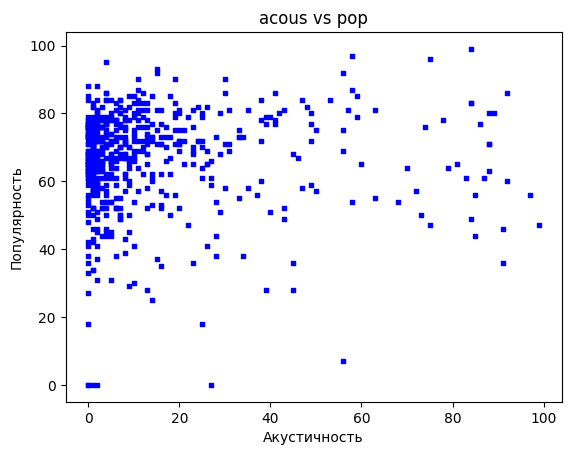

In [27]:
acous_vs_pop(top50)

Действительно, влияние живых инструментов на популярность композиции практически незаметно. 

In [28]:
acous_pop_corr = pearsonr(top50["acous"], top50["pop"])[0]
print(acous_pop_corr)

0.026703533646161813


Поиск корреляции это подтверждает

### Поставим точку в анализе акустичности композиций, посмотрев на связь этого параметра со значениями val (Valence, позитивность композиции). В привычном понимании, песня, в которой используются живые инструменты должна вызывать положительные эмоции, однако таблица корреляций говорит нам об обратном. Проверим, как связаны эти два параметра

In [29]:
def acous_vs_val(top50):
  acous_val_df = top50[['acous','val', "year"]].copy()
  acous_val_df.set_index("year", inplace = True)
  fig, ax = plt.subplots()
  ax.scatter(x = acous_val_df['acous'], y = acous_val_df['val'], c = "b", marker = "s", s = 7)
  ax.set_xlabel("Акустичность")
  ax.set_ylabel("Позитивность")
  plt.title("acous vs val")
  z = np.polyfit(acous_val_df['acous'], acous_val_df['val'], 1) # Добавим линию тренда, чтобы было понятнее, как ведут себя данные
  p = np.poly1d(z)
  plt.plot(acous_val_df['acous'],p(acous_val_df['acous']),"r--")
  return plt.show()

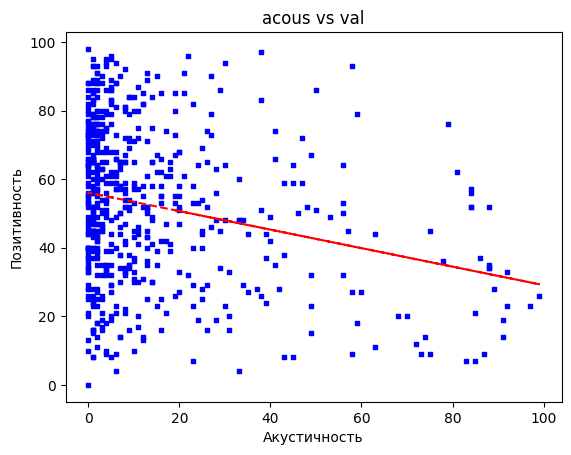

In [30]:
acous_vs_val(top50)

Несмотря на большой разброс данных, линия тренда (не зря мы ее добавили) показывает нам, что с увеличением акустичности падает позитивность трека (на удивление). Конечно, этот тренд не совсем отчетливо видно, однако с уверенностью можно сказать, что использование живых инструментов уж точно не влечет за собой увеличение позитивности композиции

По традиции посчитаем корреляцию:

In [31]:
acous_val_corr = pearsonr(top50["acous"], top50["val"])[0]
print(acous_val_corr)

-0.24903820134072543


Она получилась отрицательной, но не сильно большой по модулю

### Отвлечемся немного от корреляций и посмотрим, как менялись тренды в музыке с течением времени. Как например, менялась скорость треков (bpm) сквозь года?

In [32]:
# Будем считать средние значения по годам
import plotly.express as px
def param_through_years(top50, param):
  new_df = top50[[f"{param}", "year"]].copy()
  new_df1 = new_df.groupby("year").mean()
  graph = px.line(new_df1, title = f"{param} through years")
  return graph.show()

In [33]:
param_through_years(top50 = top50, param = "bpm")

Как можно заметить из графика, наблюдается постепенное снижение среднего темпа песен. Самое большое значение среднего bpm наблюдается в 2014 году. 

### А что происходило с длительностью песен?

In [34]:
param_through_years(top50 = top50, param = "dur")

Средняя продолжительность песен также снижается с течением времени (в рамках периода, за кторый предоставлены данные)

### Интересную тенденцию можно наблюдать в изменении длительности песен. С каждым годом средняя продолжительность постепенно снижается. Чем это можно объяснить? Первое что приходит в голову - это изменение музыкального рынка. Сейчас многие музыканты говорят о том, что не стоит делать длнные музыкальные композиции, поскольку слушателю станет скучно и он выключит трек. Давайте проверим, насколько в последние 6 лет длительность песен влияла на их популярность. (6 лет, потому что на графике наблюдается наиболее отчетливое снижение именно в этот период)

In [35]:
duplicate_df = pd.read_csv("/content/top10.csv") # Сделаем дубликат нашего датафрейма, чтобы случайно не испортить его
duplicate_df.set_index("year", inplace = True)
def dur_pop_by_years(duplicate_df, start, end):
  duplicate_df = duplicate_df.loc[start : end]
  dur_pop_df_by_years = duplicate_df[['dur','pop']].copy()
  fig, ax = plt.subplots()
  ax.scatter(x = dur_pop_df_by_years['dur'], y = dur_pop_df_by_years['pop'], c = "b", marker = "^", s = 7)
  ax.set_xlabel("Длительность")
  ax.set_ylabel("Популярность")
  plt.title("dur vs pop")
  z = np.polyfit(dur_pop_df_by_years['dur'], dur_pop_df_by_years['pop'], 1)
  p = np.poly1d(z)
  plt.plot(dur_pop_df_by_years['dur'],p(dur_pop_df_by_years['dur']),"r-")
  return plt.show()

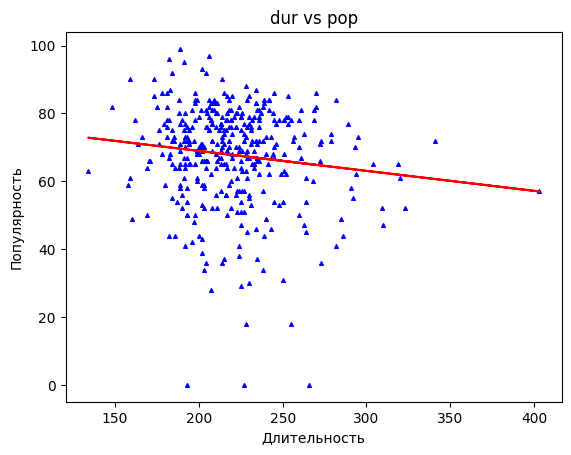

In [ ]:
dur_pop_by_years(duplicate_df, "2014", "2019")

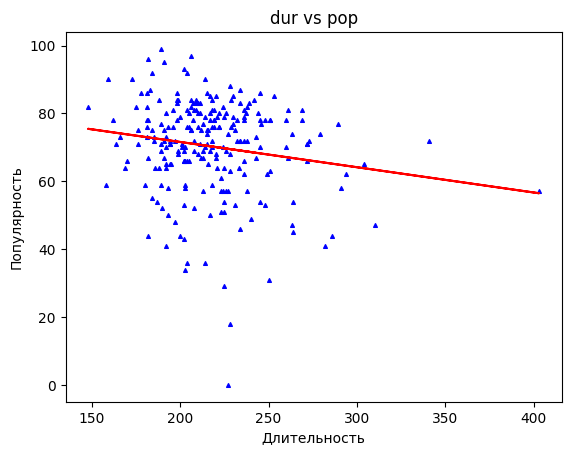

In [ ]:
dur_pop_by_years(duplicate_df, "2016", "2019")

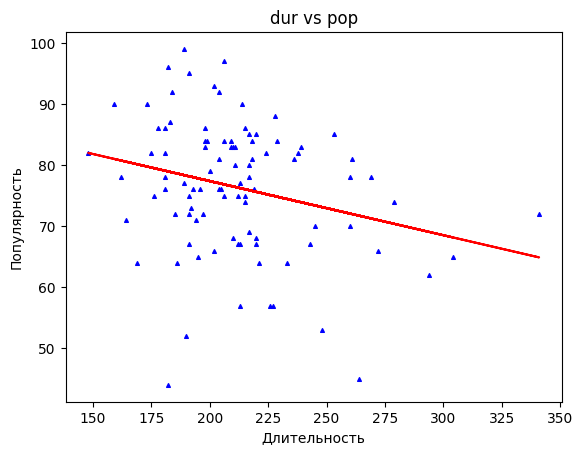

In [ ]:
dur_pop_by_years(duplicate_df, "2018", "2019")

Как мы можем заметить из графиков, с приближением периода к настоящему времени (сначала мы смотрели на 2014-2019, потом на2016-2019 и в конце на 2018-2019) линия тренда становилась все более крутой. Это говорит нам о том, что, в настоящее время больше ценятся короткие композиции, чем длинные. 

Возьмем для примера период 2016-2017 годов:

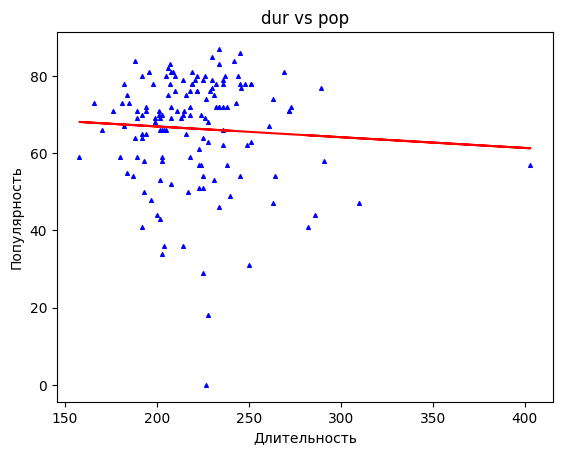

In [ ]:
dur_pop_by_years(duplicate_df, "2016", "2017")

Особой связи между длительностью и популярностью не наблюдается. Если же взять 2018-2019 года, то отчетливо видно, как с увеличением длительности композиции, умменьшается и ее популярность. 

### Посчитаем корреляции этих двух параметров для разных периодов, чтобы подкрепить свои наблюдения:

In [ ]:
def dur_pop_by_years_corr(duplicate_df, start, end):
  duplicate_df = duplicate_df.loc[start : end]
  dur_pop_by_years_corr = pearsonr(duplicate_df["dur"], duplicate_df["pop"])[0]
  return dur_pop_by_years_corr

In [ ]:
dur_pop_by_years_corr(duplicate_df, "2014", "2019")

-0.1276606125704874

In [ ]:
dur_pop_by_years_corr(duplicate_df, "2016", "2019")

-0.16844301831112413

In [ ]:
dur_pop_by_years_corr(duplicate_df, "2018", "2019")

-0.2600864567565906

In [ ]:
dur_pop_by_years_corr(duplicate_df, "2019", "2019")

-0.2908661336800248

Как мы можем заметить, при подсчете корреляций для различных периодов наблюдается отчетливый тренд, проявляющийся в увеличении корреляции (по модулю) между популярностью и длительностью песен. То есть, по ходу времени более популярными начинают становиться более короткие песни. Можно предположить, что с 2019 года до настоящего момента корреляция стала еще больше, однако это мы сможем проверить, когда появится больше данных. 

### Подводя итог данной работы, можно сделать несколько выводов:

1. Большинство параметров плохо скоррелированы друг с другом, однако из найденной информации удалось сделать на первый взгляд не очевидный вывод, а именно: использование живых инструментов отрицательно влияет на энергичность композиций. 

2. Также присутствие живых инструментов в треке негативно сказывается на его позитивности. 

3. Еще одним выводом можно назвать то, что был замечен тренд, направленный на укорачивание музыкальных композиций. (Наиболее популярные треки по длительности меньше, чем менее популярные). 

4. Также был опровергнут стереотип о том, что более популярные треки громче, чем менее популярные. (Мы выяснили, что популярность не зависит от громкости)

Конечно, можно и дальше проводить исследования и тесты, однако для этого необходимо больше данных, которые появятся в будущем. 